<a href="https://colab.research.google.com/github/krutikikani/data-analysis/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **level 1**

# **Task1: Top Cuisines**




# **Determine the top three most common cuisines in the dataset.**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Dataset .csv")
display(df.head())


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [ ]:
sum(df["Cuisines"].isna())

9

In [ ]:
cuisine_counts=df["Cuisines"].str.split(', ').explode().value_counts()
top_three_cusines=cuisine_counts.head(3)
print(top_three_cusines)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


# **Calculate the percentages of restaurants that serve each of the top cuisines.**


In [ ]:
total_restaurants = len(df["Restaurant Name"])
print(total_restaurants)

9551


In [ ]:
percentages = (top_three_cusines / total_restaurants)*100
print(percentages)

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


# **Task2: city analysis**

# **Identify the city with the highest number of restaurants in the dataset.**

In [ ]:
city_counts = df.groupby('City').size()
max_city=city_counts.idxmax()
max_count=city_counts.max()
print(f"the city with highest number of restaurants is {max_city} with {max_count}.")

the city with highest number of restaurants is New Delhi with 5473.


# **Calculate the average rating for restaurants in each city.**

In [ ]:
average_ratings = df.groupby('City')['Aggregate rating'].mean()
print(average_ratings)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


# **Determine the city with the highest average rating.**

In [ ]:
city_highest_rating = average_ratings.idxmax()
highest_rating=average_ratings.max()
print(f"the city with the highest average rating is {city_highest_rating} with an average rating of {highest_rating: .2f}")

the city with the highest average rating is Inner City with an average rating of  4.90


# **Task3: Price Range Distribution**

# **Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.**

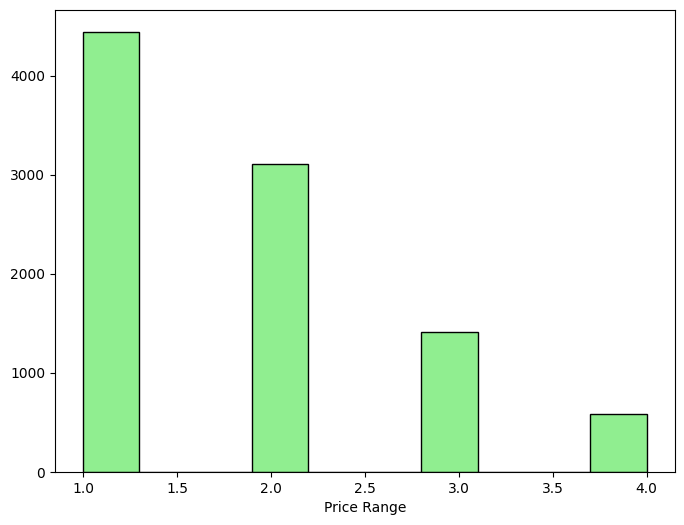

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.xlabel('Price Range')
plt.hist(df['Price range'], color='lightgreen', edgecolor='black')
plt.show()

# **Calculate the percentage of restaurants in each price range category.**

In [ ]:
r=len(df["Restaurant Name"])
p=df["Price range"].value_counts()
percentage=(p/r)*100
print("percentage of restaurants in each price range:\n", percentage)

percentage of restaurants in each price range:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


## **Task4: Online Delivery**

# **Determine the percentage of restaurants that offer online delivery.**

In [ ]:
r=len(df["Restaurant Name"])
d=df["Has Online delivery"].value_counts()
percentage=(d/r)*100
print(f"percentage of restaurants that offer online delivery:\n", percentage)

percentage of restaurants that offer online delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


# **Compare the average ratings of restaurants with and without online delivery.**

In [ ]:
online_delivery = df[df["Has Online delivery"] == 'Yes']
no_online_delivery = df[df["Has Online delivery"] == 'No']
avg_rating_online = online_delivery["Aggregate rating"].mean()
avg_rating_no_online = no_online_delivery["Aggregate rating"].mean()
print(f"Average rating for restaurants with online delivery: {avg_rating_online:.2f}")
print(f"Average rating for restaurants without online delivery: {avg_rating_no_online:.2f}")

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.47


## **level 2**

# **Task 1: Restaurant Ratings**

# **Analyze the distribution of aggregate ratings and determine the most common rating range.**

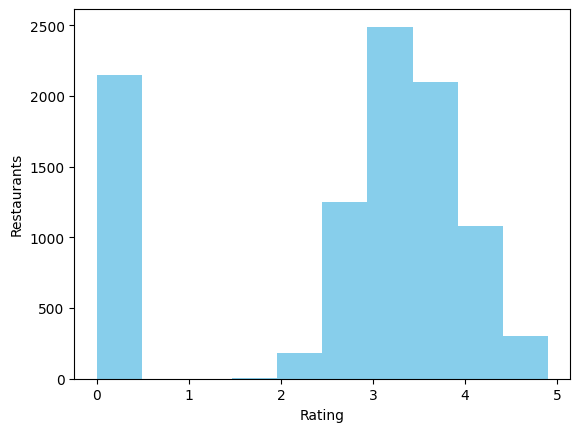

The most common rating range is: 0.0 with 2148 Restaurant.


In [ ]:
p=df["Aggregate rating"].value_counts().sort_index()
plt.hist(df['Aggregate rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Restaurants')
plt.show()
most_common_range = p.idxmax()
most_common_count = p.max()
print(f"The most common rating range is: {most_common_range} with {most_common_count} Restaurant.")

# **Calculate the average number of votes received by restaurants.**

In [ ]:
average_votes=df["Votes"].mean()
print(f"the average number of votes received by restaurants: {average_votes:.2f}")

the average number of votes received by restaurants: 156.91


# **Task2: Cuisine Combination**

# **Identify the most common combinations of cuisines in the dataset.**

In [ ]:
c=df["Cuisines"].value_counts()
print("the most common combinations of cuisines are:", c.head(5))

the most common combinations of cuisines are: Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64


# **Determine if certain cuisine combinations tend to have higher ratings.**

In [ ]:
average_ratings = df.groupby("Cuisines")["Aggregate rating"].mean()
print(f"cuisine combination {average_ratings.idxmax()} has the highest rating is {average_ratings.max()}" )

cuisine combination American, BBQ, Sandwich has the highest rating is 4.9


# **Task3: Geographic Analysis**

# **Plot the locations of restaurants on a map using longitude and latitude coordinates.**

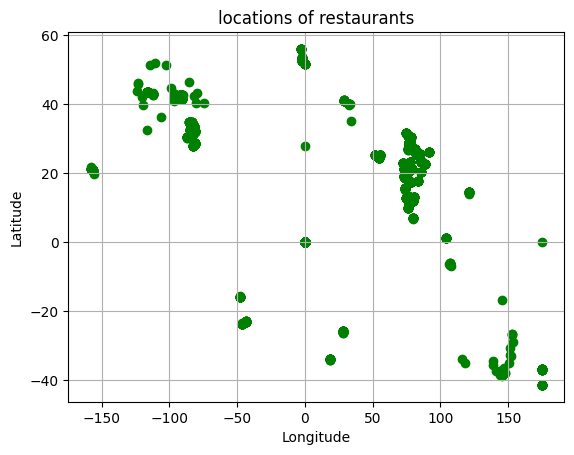

In [ ]:
plt.scatter(df["Longitude"], df["Latitude"], c="green")
plt.title("locations of restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# **Identify any patterns or clusters of restaurants in specific areas.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


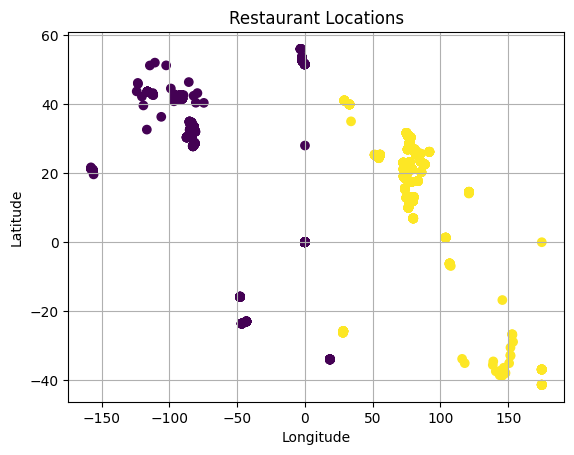

In [ ]:
from sklearn.cluster import KMeans
X = df[["Longitude", "Latitude"]]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['cluster'] = kmeans.labels_
plt.scatter(df["Longitude"], df["Latitude"], c=df["cluster"])
plt.title("Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# **Task4: Restaurant Chains**

# **Identify if there are any restaurant chains present in the dataset.**

In [ ]:
counts = df["Restaurant Name"].value_counts()
chains = counts[counts > 1]
print("restaurant chains:",chains)

restaurant chains: Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


# **Analyze the ratings and popularity of different restaurant chains.**

In [ ]:
chain = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()
sorted_restaurants = chain.sort_values(by=['Aggregate rating',"Votes"], ascending=[False,False])
print(sorted_restaurants)

                          Restaurant Name  Aggregate rating  Votes
6263                     Talaga Sampireun               4.9   5514
4182                      Mirchi And Mime               4.9   3244
4078        McGuire's Irish Pub & Brewery               4.9   2238
3115            Indian Accent - The Manor               4.9   1934
4995  Pom Pom's Teahouse and Sandwicheria               4.9   1457
...                                   ...               ...    ...
7391                     Zaika Muradabadi               0.0      0
7392                     Zaika Restaurant               0.0      0
7395                Zaika-E-Chaap Express               0.0      0
7407             Zayka chicken restaurant               0.0      0
7423                              Zombiez               0.0      0

[7446 rows x 3 columns]
